# Test

In [1]:

import pandas as pd             # manipulation de données tabulaires
import sys
import os
import json                     # pour afficher proprement le JSON si besoin
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))


In [2]:
history_elo = pd.read_parquet("../data/processed/elos_history.parquet")


In [3]:
history_elo.columns

Index(['season', 'matchday', 'team', 'elo_before'], dtype='object')

## Code test pour prédiction match

In [3]:
from src.features import match_features_pred
from src.etl import load_raw_matches
import joblib

In [5]:
matches_2025= load_raw_matches("../data/raw/",season_id=2025)
df_matches_25 = pd.json_normalize(matches_2025["matches"])


In [6]:
X_pred,y_none,label_pred=match_features_pred(df_matches_25,history_elo,18)

c:\Users\jubre\Desktop\python_ws\ligue1_viz\src\features\match__feature_pred.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label["game_name"]=label["homeTeam.name"]+" / "+label["awayTeam.name"]


In [7]:
model=joblib.load("../models/match_prediction")

In [8]:
y_proba = model.predict_proba(X_pred)

In [9]:
proba_df = pd.DataFrame(
    y_proba,
    columns=model.classes_
)

proba_df

,AWAY_TEAM,DRAW,HOME_TEAM
0,0.306138,0.245809,0.448053
1,0.318889,0.216218,0.464893
2,0.246212,0.216322,0.537466
3,0.296305,0.237078,0.466617
4,0.369646,0.228457,0.401897
5,0.327239,0.222810,0.449951
6,0.233266,0.195740,0.570995
7,0.296032,0.218759,0.485209
8,0.282659,0.219181,0.498160


In [10]:
label_pred = label_pred.reset_index(drop=True)

final_df = pd.concat([label_pred, proba_df], axis=1)
final_df

,matchday,homeTeam.name,awayTeam.name,game_name,AWAY_TEAM,DRAW,HOME_TEAM
0,18,Toulouse FC,OGC Nice,Toulouse FC / OGC Nice,0.306138,0.245809,0.448053
1,18,Olympique Lyonnais,Stade Brestois 29,Olympique Lyonnais / Stade Brestois 29,0.318889,0.216218,0.464893
2,18,Paris Saint-Germain FC,Lille OSC,Paris Saint-Germain FC / Lille OSC,0.246212,0.216322,0.537466
3,18,Stade Rennais FC 1901,Le Havre AC,Stade Rennais FC 1901 / Le Havre AC,0.296305,0.237078,0.466617
4,18,Angers SCO,Olympique de Marseille,Angers SCO / Olympique de Marseille,0.369646,0.228457,0.401897
5,18,FC Nantes,Paris FC,FC Nantes / Paris FC,0.327239,0.222810,0.449951
6,18,Racing Club de Lens,AJ Auxerre,Racing Club de Lens / AJ Auxerre,0.233266,0.195740,0.570995
7,18,AS Monaco FC,FC Lorient,AS Monaco FC / FC Lorient,0.296032,0.218759,0.485209
8,18,RC Strasbourg Alsace,FC Metz,RC Strasbourg Alsace / FC Metz,0.282659,0.219181,0.498160


In [11]:
os.makedirs("../data/processed", exist_ok=True)
processed_path = "../data/processed/next_matchday_prediction.parquet"

final_df.to_parquet(processed_path, index=False)

In [4]:
from src.etl import display_prediction


In [2]:
df_pred = pd.read_parquet("../data/processed/next_matchday_prediction.parquet")


In [3]:
from src.viz import vizualisation_prediction

In [4]:
fig1=vizualisation_prediction(df_pred)

In [5]:
fig1


In [4]:
display_prediction(df_pred,"RC Strasbourg Alsace / FC Metz")

,RC Strasbourg Alsace,Match nul,FC Metz
8,49.8%,21.9%,28.3%


## Vieux code test

In [4]:
history_elo_23=history_elo[history_elo.season=="2023-08-11"]
history_elo_24=history_elo[history_elo.season=="2024-08-18"]
history_elo_25=history_elo[history_elo.season=="2025-08-17"]

In [5]:
history_elo_25

,season,matchday,team,elo_before
1224,2025-08-17,1,REN,1478.648357
1225,2025-08-17,1,MAR,1560.162858
1226,2025-08-17,1,RCL,1521.538676
1227,2025-08-17,1,LYO,1541.765315
1228,2025-08-17,1,ASM,1563.753774
...,...,...,...,...
1547,2025-08-17,18,FCM,1327.653891
1548,2025-08-17,18,AJA,1386.039080
1549,2025-08-17,18,ANG,1426.792582
1550,2025-08-17,18,ASS,1387.094131


In [6]:
history_elo_24[history_elo_24.matchday==max(history_elo_24.matchday)].sort_values(by='elo_before',axis=0,ascending=False)

,season,matchday,team,elo_before
1222,2024-08-18,34,PSG,1726.243182
1221,2024-08-18,34,ASM,1599.105751
1206,2024-08-18,34,MAR,1573.709312
1214,2024-08-18,34,LIL,1572.631135
1210,2024-08-18,34,NIC,1555.858680
1208,2024-08-18,34,LYO,1551.026411
1216,2024-08-18,34,RC,1535.989030
1220,2024-08-18,34,RCL,1514.617515
1211,2024-08-18,34,BRE,1509.874886
1207,2024-08-18,34,REN,1478.038974


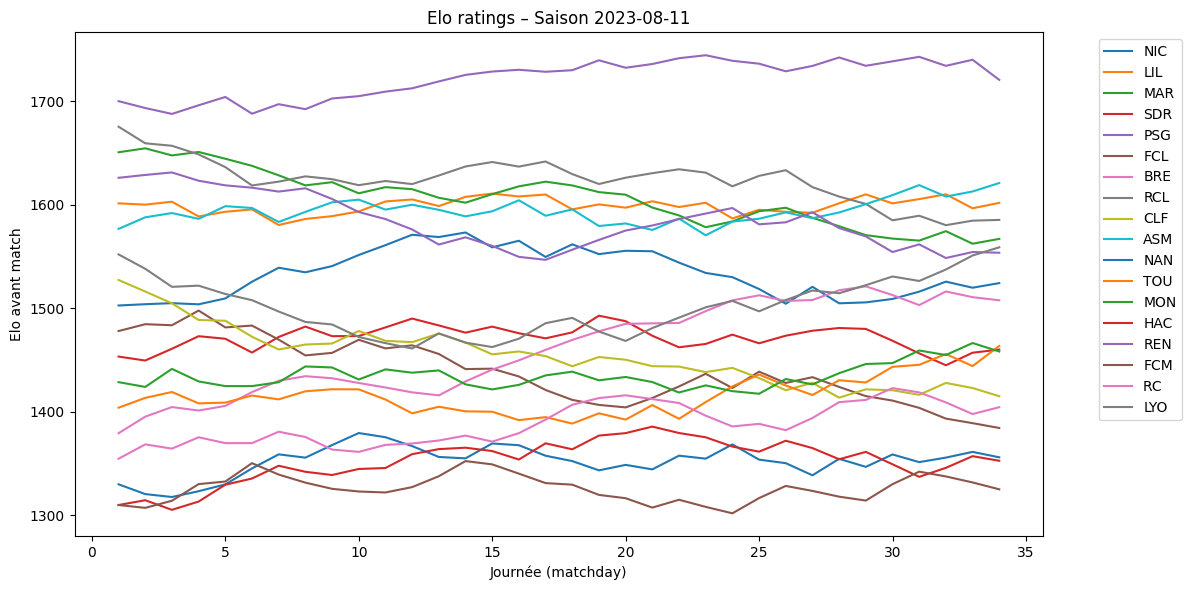

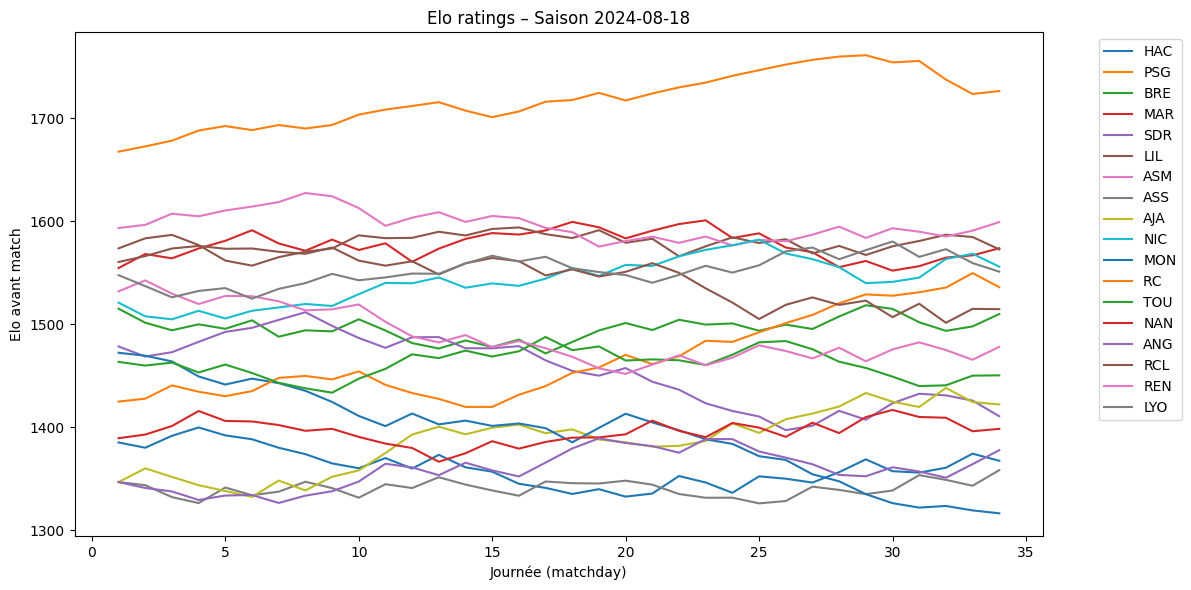

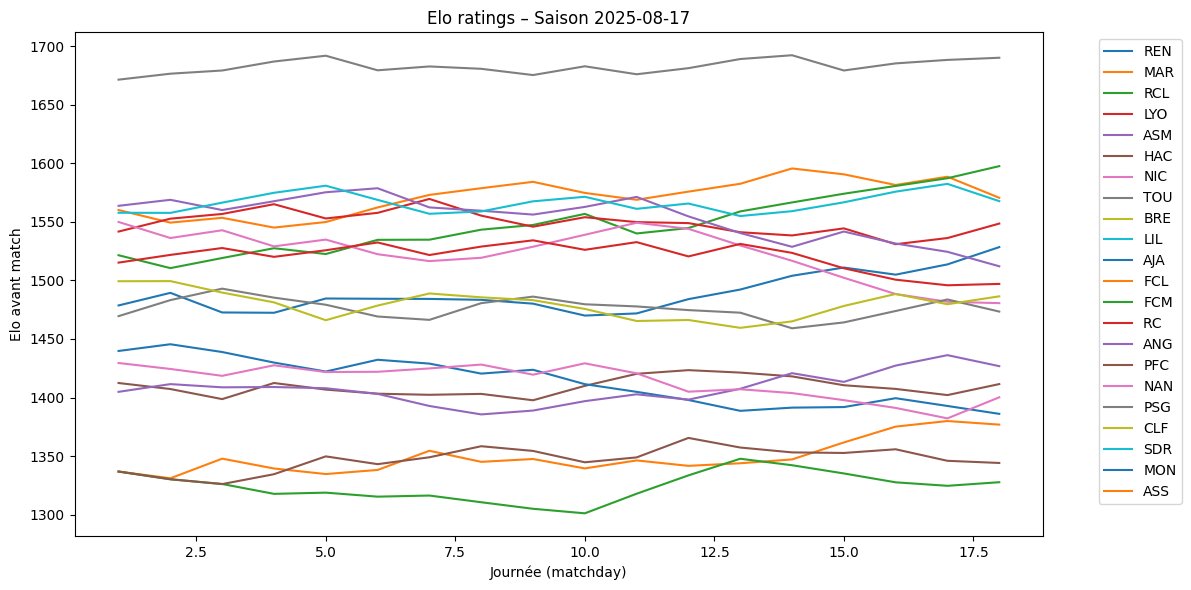

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

teams = history_elo_23["team"].unique()

for team in teams:
    sub = history_elo_23[history_elo_23["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_23['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

teams = history_elo_24["team"].unique()

for team in teams:
    sub = history_elo_24[history_elo_24["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_24['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

teams = history_elo_25["team"].unique()

for team in teams:
    sub = history_elo_25[history_elo_25["team"] == team]
    plt.plot(sub["matchday"], sub["elo_before"], label=team)

plt.xlabel("Journée (matchday)")
plt.ylabel("Elo avant match")
plt.title(f"Elo ratings – Saison {history_elo_25['season'].iloc[0]}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
history_elo_23["team"].unique()

array(['NIC', 'LIL', 'MAR', 'SDR', 'PSG', 'FCL', 'BRE', 'RCL', 'CLF',
       'ASM', 'NAN', 'TOU', 'MON', 'HAC', 'REN', 'FCM', 'RC ', 'LYO'],
      dtype=object)

In [9]:
from src.etl import load_raw_matches, find_next_opponent,fetch_matches,save_raw_matches

In [10]:
#matches_json=fetch_matches(2015,2025)
#save_raw_matches(matches_json,"../data/raw")

In [11]:
matches_json = load_raw_matches("../data/raw/",season_id=2025)
matches_2024= load_raw_matches("../data/raw/",season_id=2024)
matches_2023= load_raw_matches("../data/raw/",season_id=2023)

In [12]:
matches_list = matches_json["matches"]
df_matches = pd.json_normalize(matches_list)

matches_list_24 = matches_2024["matches"]
df_matches_24 = pd.json_normalize(matches_list_24)

matches_list_23 = matches_2023["matches"]
df_matches_23 = pd.json_normalize(matches_list_23)

In [13]:
from src.features import match_features_pred,match_features_train, prepare_match_features

In [14]:
X_p,y_p,label_p=match_features_pred(df_matches,history_elo,17)

In [15]:
label_p

,matchday,homeTeam.name,awayTeam.name
144,17,Toulouse FC,Racing Club de Lens
145,17,Stade Brestois 29,AJ Auxerre
146,17,Olympique de Marseille,FC Nantes
147,17,Lille OSC,Stade Rennais FC 1901
148,17,OGC Nice,RC Strasbourg Alsace
149,17,Paris Saint-Germain FC,Paris FC
150,17,FC Lorient,FC Metz
151,17,Le Havre AC,Angers SCO
152,17,AS Monaco FC,Olympique Lyonnais


In [16]:
df_matches_23=df_matches_23[df_matches_23["status"]=="FINISHED"]



In [17]:
print(df_matches["homeTeam.tla"].unique())
df_matches["homeTeam.name"].unique()

['REN' 'RCL' 'ASM' 'NIC' 'BRE' 'AJA' 'FCM' 'ANG' 'NAN' 'PSG' 'MAR' 'LYO'
 'FCL' 'HAC' 'TOU' 'RC ' 'LIL' 'PFC']


array(['Stade Rennais FC 1901', 'Racing Club de Lens', 'AS Monaco FC',
       'OGC Nice', 'Stade Brestois 29', 'AJ Auxerre', 'FC Metz',
       'Angers SCO', 'FC Nantes', 'Paris Saint-Germain FC',
       'Olympique de Marseille', 'Olympique Lyonnais', 'FC Lorient',
       'Le Havre AC', 'Toulouse FC', 'RC Strasbourg Alsace', 'Lille OSC',
       'Paris FC'], dtype=object)

In [18]:

df_matches.utcDate

0      2025-08-15T18:45:00Z
1      2025-08-16T15:00:00Z
2      2025-08-16T17:00:00Z
3      2025-08-16T19:05:00Z
4      2025-08-17T13:00:00Z
               ...         
301    2026-05-16T19:00:00Z
302    2026-05-16T19:00:00Z
303    2026-05-16T19:00:00Z
304    2026-05-16T19:00:00Z
305    2026-05-16T19:00:00Z
Name: utcDate, Length: 306, dtype: object

In [19]:

df_matches_tot = pd.concat([df_matches, df_matches_24,df_matches_23], ignore_index=True)
df_matches_tot.shape

(918, 39)

In [20]:
df_matches_tot["score.winner"].value_counts()/df_matches_tot.shape[0]

score.winner
HOME_TEAM    0.370370
AWAY_TEAM    0.271242
DRAW         0.191721
Name: count, dtype: float64

In [21]:
find_next_opponent(matches_json,"Stade Rennais FC 1901")

'Le Havre AC'

In [22]:
df = pd.read_parquet("../data/processed/standings_long.parquet")

df.head()

,matchday,team,points,points_cum,gf_cum,ga_cum,gdif_cum,wins_cum,draws_cum,losses_cum,rank
0,1,AS Monaco FC,3,3,3.0,1.0,2.0,1,0,0,1
1,1,AJ Auxerre,3,3,1.0,0.0,1.0,1,0,0,2
2,1,Angers SCO,3,3,1.0,0.0,1.0,1,0,0,3
3,1,Olympique Lyonnais,3,3,1.0,0.0,1.0,1,0,0,4
4,1,Paris Saint-Germain FC,3,3,1.0,0.0,1.0,1,0,0,5


In [23]:
from viz import compare_gdif, compare_ga, compare_gf, compare_points_total, compare_rank, compare_resultats

ModuleNotFoundError: No module named 'viz'

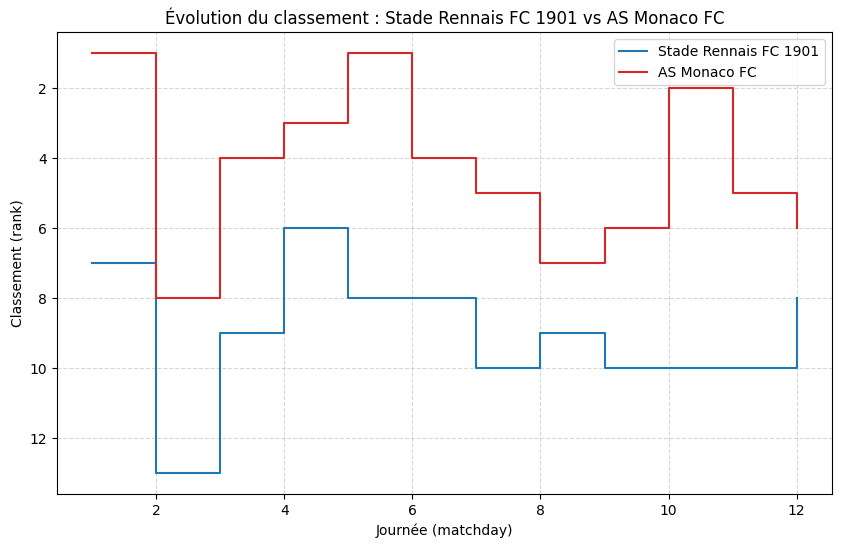

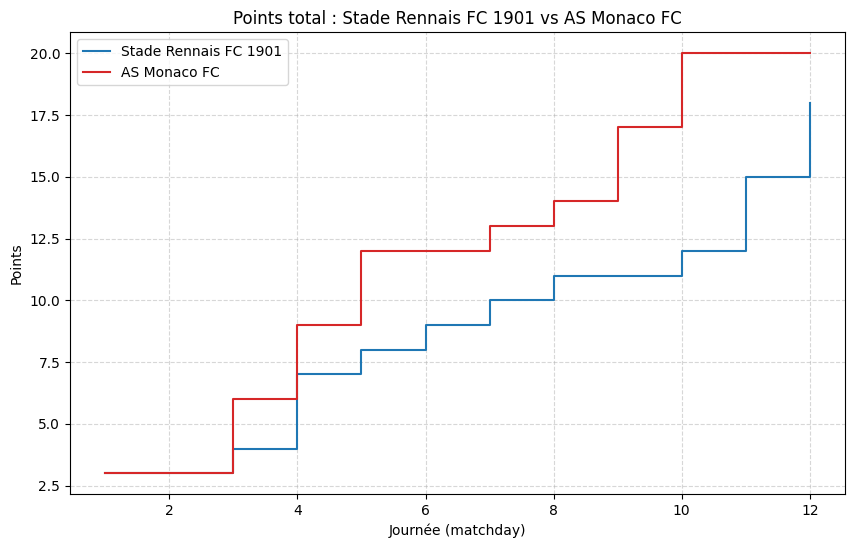

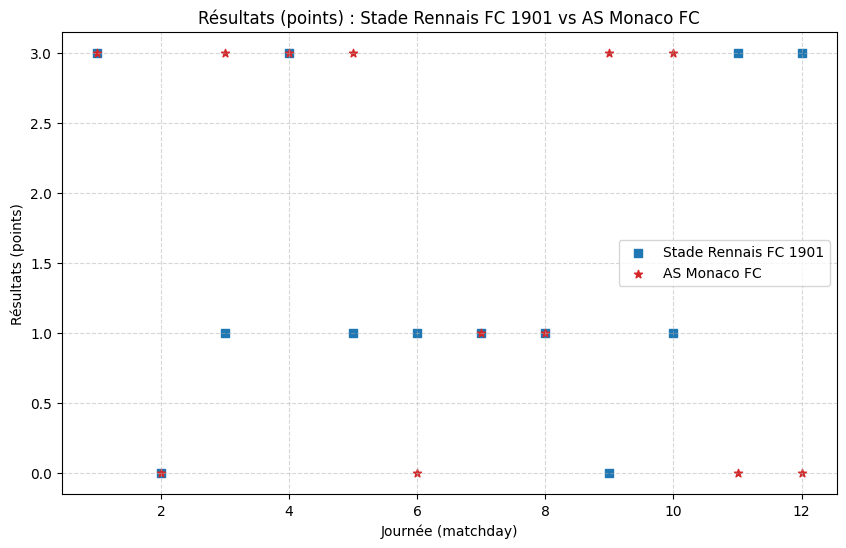

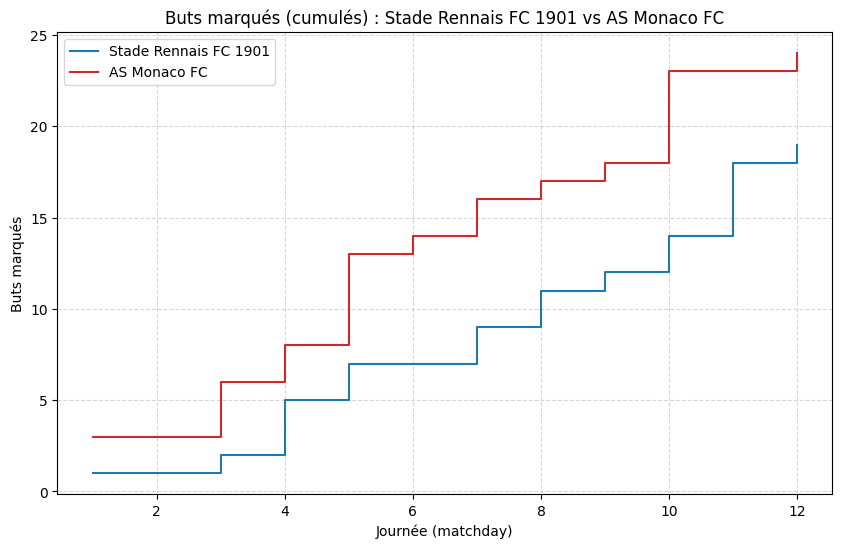

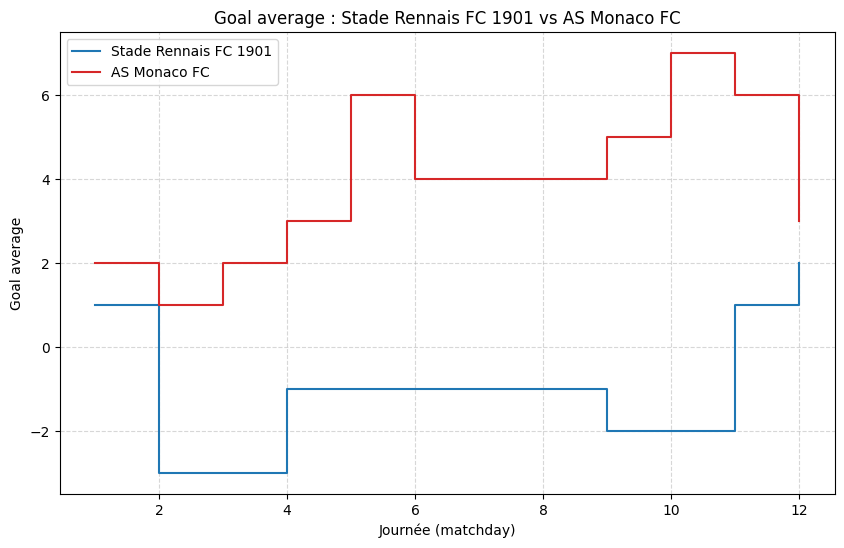

In [ ]:
compare_rank(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_points_total(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_resultats(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_gf(df,'Stade Rennais FC 1901','AS Monaco FC')
compare_gdif(df,'Stade Rennais FC 1901','AS Monaco FC')